## DATA VISUALISATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
file1=pd.read_csv('IEEE dataset/ORIGINAL DATA/april28-may29.csv',header=None)

In [3]:
file1.head(n=10)

,0,1
0,1254995208888094721,0.000000
1,1254995485452050438,0.000000
2,1254995705527177216,0.525000
3,1254995868333289475,0.287500
4,1254996123514789893,0.000000
5,1254996305082036224,0.313973
6,1254996436162277377,-0.050000
7,1254996786105790464,0.000000
8,1254997859285508096,0.000000
9,1254998021722390531,0.000000


In [4]:
file1.shape

(46059, 2)

In [5]:
sent_score=file1.values[:,1]                 #sentiment score

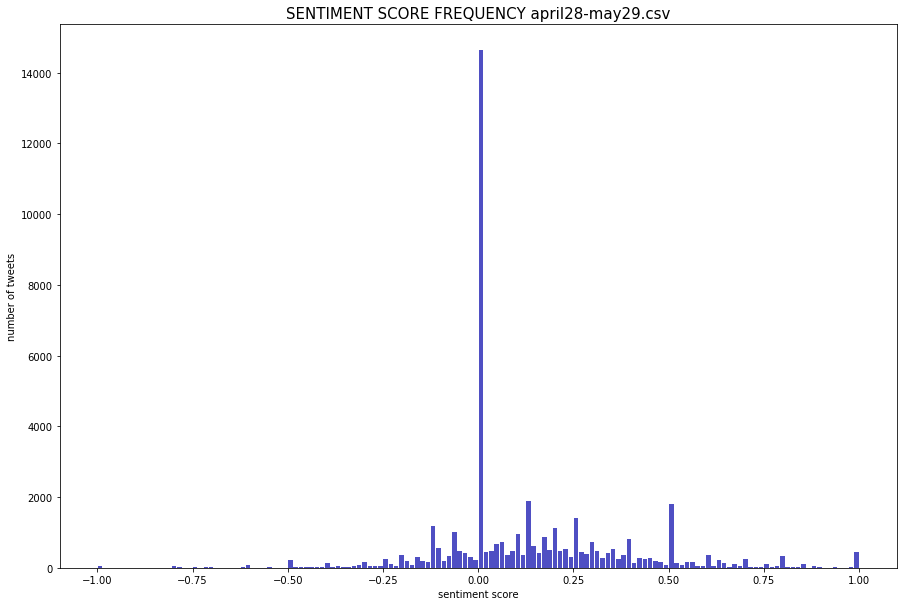

In [6]:
plt.figure(figsize=(15,10))
n, bins, patches = plt.hist(x=sent_score, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('sentiment score')
plt.ylabel('number of tweets')
plt.title('SENTIMENT SCORE FREQUENCY april28-may29.csv',fontsize=15)
plt.show()


### * *the dataset is imbalanced i.e., majority of the tweets are NEUTRAL(represented by sentiment score 0)*
### *  *Less number of tweets have positive or negative sentiment*

In [7]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)),['tweet_id','sentiment'], rotation=90)
    plt.yticks(range(len(corr.columns)),['tweet_id','sentiment'])
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix april28-may30', fontsize=15)
    plt.show()

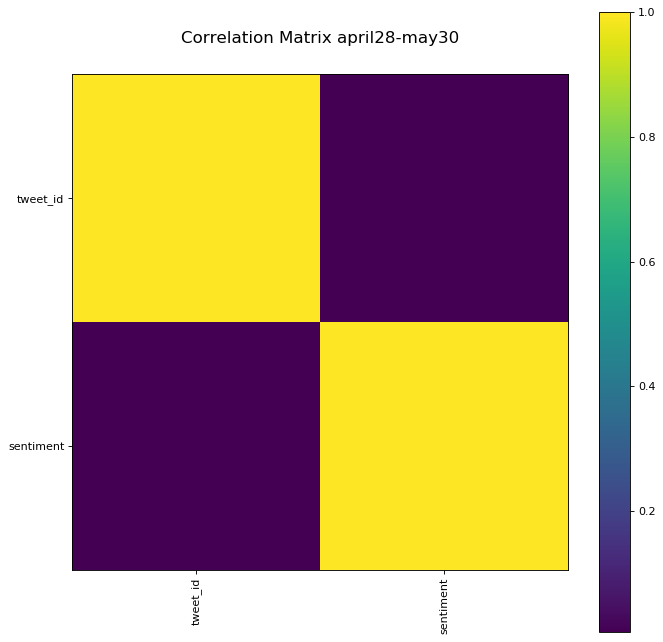

In [8]:
plotCorrelationMatrix(file1, 10)

In [9]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot for file april28-may29.csv',fontsize=textSize)
    plt.show()

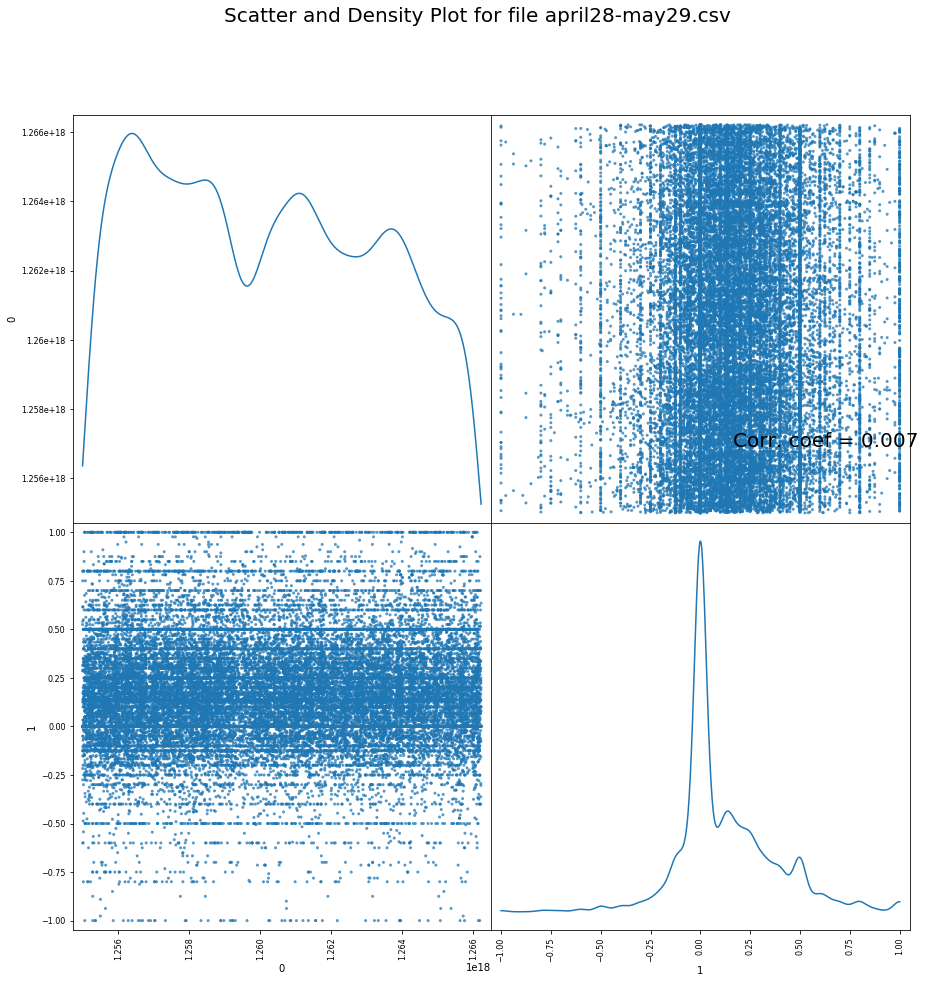

In [10]:
plotScatterMatrix(file1, 15,20)

## PREPROCESSING AND HYDRATING TWEETS

* An additional helper jupyter notebook has been made for hydrating and preprocessing the tweets
* Check the ipynb notebook named as "HYDRATING TWEET IDS AND PREPROCESSING THEM.ipynb"
* The clean_tweets and their sentiments were stored in .txt format in the directory IEEE dataset/PROCESSED DATA

##### STEPS USED IN CLEANING TWEETS
* LowerCasing- The tweet is first converted into lower case
* Removal of Retweet|RT|via
* Removal of mentions(like @xyz)
* Removal of links in the tweet
* Negation handling
* Tokenisation to get standard english words only
* Stop word removal - the stopwords were modified
* Lemmatization using WordNetLemmatizer

In [13]:
# checking the first 10 clean tweets and their sentiment
file=open('IEEE dataset/PROCESSED DATA/april28-may29.txt','r')
line=file.readlines()
i=0
for l in line:
    print(l)
    i+=1
    if(i==10):
        break

file.close()

0.525 nothing beautiful someone go way make life beautiful others unknown covid coronavirus iseowoomogbolahan give music timgodfreyworld

0.313973063973064 happy bihday mom believe happening bestmom bestfriend happybihday son covid newyorkstrong wereallinthistogether staysafe friend sand point new york

-0.05 

0.0 corona cutie cary noh carolina

-0.275 strange statue not know wtf stayhome covid ansan park

-0.21666666666666667 known coronavirus not affect training today event postpone november nov since march serious coronavirus outbreak

-0.125 job statistic collated job amp apprenticeship cut risk temporary permanent job planned created job furloughed saved reduced hour working home due covid

0.8 see post covid stayhome staysafe happy place

0.75 lego creator expe fordmustang bag lego expe challenging perfect covid stay home fairchance road

0.5416666666666666 workplace attire orange wonder eye not think seriousness not expecting anxiety work today stay strong world coronavirus lka

In [14]:
len(line)

22493

## DATASET PREPARATION

In [15]:
X=[]
Y=[]

In [16]:
file=open('IEEE dataset/PROCESSED DATA/april28-may29.txt','r')
data_=file.read()
lines=data_.split('\n')
for l in lines:
    df=l.split(' ')
    sent=df[0]
    tweet=' '.join(df[1:])
    if sent!='' and tweet!='':
        X.append(tweet)
        Y.append(sent)

In [17]:
file.close()

In [18]:
X[:5]

['nothing beautiful someone go way make life beautiful others unknown covid coronavirus iseowoomogbolahan give music timgodfreyworld',
 'happy bihday mom believe happening bestmom bestfriend happybihday son covid newyorkstrong wereallinthistogether staysafe friend sand point new york',
 'corona cutie cary noh carolina',
 'strange statue not know wtf stayhome covid ansan park',
 'known coronavirus not affect training today event postpone november nov since march serious coronavirus outbreak']

In [19]:
Y[:5]

['0.525', '0.313973063973064', '0.0', '-0.275', '-0.21666666666666667']

In [20]:
Y_train=[]
for e in Y:
    float_e=float(e)
    Y_train.append(float_e)

In [21]:
print(len(X),len(Y_train))

21529 21529


##  WORD EMBEDDINGS USING GLOVE

In [22]:
glove_file=open('glove.6B.50d.txt',encoding='utf8')

In [23]:
word_vec_dict={}
for l in glove_file:
    lis=l.split(' ')
    word=lis[0]
    coef=np.asarray(lis[1:],dtype=float)
    word_vec_dict[word]=coef

In [24]:
word_vec_dict['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [25]:
word_vec_dict['lockdown']

array([-0.47487 , -0.81948 , -0.18139 ,  0.057474, -0.75038 , -1.1057  ,
        1.1509  ,  0.19458 ,  0.5769  , -0.043834,  0.01082 , -0.95895 ,
       -0.32281 ,  0.27198 ,  0.46615 ,  0.76463 , -0.27439 , -0.17523 ,
       -0.30079 ,  0.76395 ,  0.043029,  0.36852 , -0.81589 , -0.30727 ,
       -0.61097 ,  0.21033 ,  0.64635 ,  0.28157 ,  0.45558 ,  0.1261  ,
        0.61943 , -0.13525 , -0.42841 , -0.12151 , -0.42193 ,  1.2432  ,
        1.6955  , -1.1186  , -0.42648 , -0.19214 , -0.67354 , -0.47223 ,
       -0.26242 ,  0.76397 ,  0.075944, -0.63414 ,  0.97899 , -0.08325 ,
       -0.32151 , -0.062519])

In [26]:
glove_file.close()

## EMBEDDING LAYER OUTPUT

In [27]:
#finding max_word_length for the embedding matrix
word_lens=[]
for sent in X:
    words=sent.split(' ')
    word_len=len(words)
    word_lens.append(word_len)

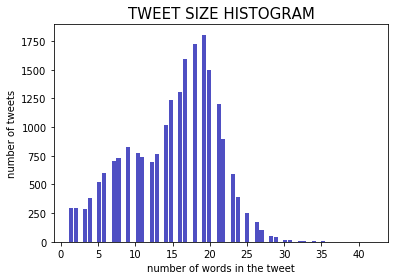

In [28]:
n, bins, patches = plt.hist(x=word_lens, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('number of words in the tweet')
plt.ylabel('number of tweets')
plt.title('TWEET SIZE HISTOGRAM',fontsize=15)
plt.show()

In [29]:
# from above data majority tweets have 22 as average word length
max_words=25

In [30]:
def emb_out(X,max_words):
    out=np.zeros((len(X),max_words,50))
    for i,s in enumerate(X):
        words_=s.split(' ')
        words_=words_[:max_words]
        for j,w in enumerate(words_):
            try:
                out[i][j]=word_vec_dict[w]
            except:
                out[i][j]=np.zeros((50,))
            
    return out

In [31]:
X_emb=emb_out(X,25)

In [32]:
X_emb.shape

(21529, 25, 50)

## MODEL ARCHITECTURE 

In [56]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [36]:
model=Sequential()
model.add(LSTM(64,input_shape=(25,50),return_sequences=True))
model.add(Dropout(0.4))      #dropout to avoid overfitting
model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(1,activation='tanh'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 25, 64)            29440     
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 41,889
Trainable params: 41,889
Non-trainable params: 0
_________________________________________________________________


## COMPILING AND TRAINING THE MODEL

In [38]:
model.compile(loss='mae',optimizer='adam',metrics=['mse','mae','msle'])

W0702 14:44:43.866536 17560 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0702 14:44:43.906425 17560 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:1521: The name tf.log is deprecated. Please use tf.math.log instead.



In [39]:
check_point=ModelCheckpoint('model_weights/best_stacked_lstm1.h5',
    monitor='val_loss',
    verbose=True,
    save_best_only=True,
    mode='auto',
    period=1,
)

In [40]:
hist=model.fit(X_emb,Y_train,epochs=100,batch_size=64,shuffle=True,validation_split=0.3,callbacks=[check_point])

W0702 14:44:59.325778 17560 deprecation.py:323] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15070 samples, validate on 6459 samples
Epoch 1/100
15070/15070 [==============================] - 7s 487us/step - loss: 0.1753 - mean_squared_error: 0.0688 - mean_absolute_error: 0.1753 - mean_squared_logarithmic_error: 0.0327 - val_loss: 0.1638 - val_mean_squared_error: 0.0596 - val_mean_absolute_error: 0.1638 - val_mean_squared_logarithmic_error: 0.0283

Epoch 00001: val_loss improved from inf to 0.16383, saving model to model_weights/best_stacked_lstm1.h5
Epoch 2/100
15070/15070 [==============================] - 6s 423us/step - loss: 0.1643 - mean_squared_error: 0.0611 - mean_absolute_error: 0.1643 - mean_squared_logarithmic_error: 0.0283 - val_loss: 0.1562 - val_mean_squared_error: 0.0537 - val_mean_absolute_error: 0.1562 - val_mean_squared_logarithmic_error: 0.0250

Epoch 00002: val_loss improved from 0.16383 to 0.15625, saving model to model_weights/best_stacked_lstm1.h5
Epoch 3/100
15070/15070 [==============================] - 7s 438us/step - loss: 0.1583 - mean_squa

15070/15070 [==============================] - 9s 604us/step - loss: 0.1139 - mean_squared_error: 0.0356 - mean_absolute_error: 0.1139 - mean_squared_logarithmic_error: 0.0152 - val_loss: 0.1326 - val_mean_squared_error: 0.0443 - val_mean_absolute_error: 0.1326 - val_mean_squared_logarithmic_error: 0.0207

Epoch 00021: val_loss improved from 0.13290 to 0.13257, saving model to model_weights/best_stacked_lstm1.h5
Epoch 22/100
15070/15070 [==============================] - 8s 542us/step - loss: 0.1110 - mean_squared_error: 0.0347 - mean_absolute_error: 0.1110 - mean_squared_logarithmic_error: 0.0147 - val_loss: 0.1337 - val_mean_squared_error: 0.0445 - val_mean_absolute_error: 0.1337 - val_mean_squared_logarithmic_error: 0.0210

Epoch 00022: val_loss did not improve from 0.13257
Epoch 23/100
15070/15070 [==============================] - 8s 540us/step - loss: 0.1102 - mean_squared_error: 0.0342 - mean_absolute_error: 0.1102 - mean_squared_logarithmic_error: 0.0145 - val_loss: 0.1329 - va


Epoch 00041: val_loss did not improve from 0.13257
Epoch 42/100
15070/15070 [==============================] - 8s 515us/step - loss: 0.0891 - mean_squared_error: 0.0258 - mean_absolute_error: 0.0891 - mean_squared_logarithmic_error: 0.0107 - val_loss: 0.1389 - val_mean_squared_error: 0.0466 - val_mean_absolute_error: 0.1389 - val_mean_squared_logarithmic_error: 0.0217

Epoch 00042: val_loss did not improve from 0.13257
Epoch 43/100
15070/15070 [==============================] - 8s 520us/step - loss: 0.0887 - mean_squared_error: 0.0255 - mean_absolute_error: 0.0887 - mean_squared_logarithmic_error: 0.0105 - val_loss: 0.1377 - val_mean_squared_error: 0.0471 - val_mean_absolute_error: 0.1377 - val_mean_squared_logarithmic_error: 0.0221

Epoch 00043: val_loss did not improve from 0.13257
Epoch 44/100
15070/15070 [==============================] - 8s 534us/step - loss: 0.0884 - mean_squared_error: 0.0254 - mean_absolute_error: 0.0884 - mean_squared_logarithmic_error: 0.0104 - val_loss: 0.1

15070/15070 [==============================] - 8s 529us/step - loss: 0.0765 - mean_squared_error: 0.0210 - mean_absolute_error: 0.0765 - mean_squared_logarithmic_error: 0.0085 - val_loss: 0.1421 - val_mean_squared_error: 0.0496 - val_mean_absolute_error: 0.1421 - val_mean_squared_logarithmic_error: 0.0232

Epoch 00063: val_loss did not improve from 0.13257
Epoch 64/100
15070/15070 [==============================] - 8s 523us/step - loss: 0.0770 - mean_squared_error: 0.0211 - mean_absolute_error: 0.0770 - mean_squared_logarithmic_error: 0.0085 - val_loss: 0.1406 - val_mean_squared_error: 0.0493 - val_mean_absolute_error: 0.1406 - val_mean_squared_logarithmic_error: 0.0229 - mean_squared_error: 0.0214 - mean_absolute_error: 0.0772 - mean_

Epoch 00064: val_loss did not improve from 0.13257
Epoch 65/100
15070/15070 [==============================] - 8s 526us/step - loss: 0.0759 - mean_squared_error: 0.0207 - mean_absolute_error: 0.0759 - mean_squared_logarithmic_error: 0.0083 - val_loss: 0

15070/15070 [==============================] - 8s 521us/step - loss: 0.0694 - mean_squared_error: 0.0184 - mean_absolute_error: 0.0694 - mean_squared_logarithmic_error: 0.0074 - val_loss: 0.1441 - val_mean_squared_error: 0.0521 - val_mean_absolute_error: 0.1441 - val_mean_squared_logarithmic_error: 0.0242

Epoch 00083: val_loss did not improve from 0.13257
Epoch 84/100
15070/15070 [==============================] - 8s 526us/step - loss: 0.0690 - mean_squared_error: 0.0183 - mean_absolute_error: 0.0690 - mean_squared_logarithmic_error: 0.0074 - val_loss: 0.1448 - val_mean_squared_error: 0.0522 - val_mean_absolute_error: 0.1448 - val_mean_squared_logarithmic_error: 0.0240

Epoch 00084: val_loss did not improve from 0.13257
Epoch 85/100
15070/15070 [==============================] - 8s 514us/step - loss: 0.0684 - mean_squared_error: 0.0182 - mean_absolute_error: 0.0684 - mean_squared_logarithmic_error: 0.0073 - val_loss: 0.1444 - val_mean_squared_error: 0.0511 - val_mean_absolute_error: 0

In [41]:
data=hist.history

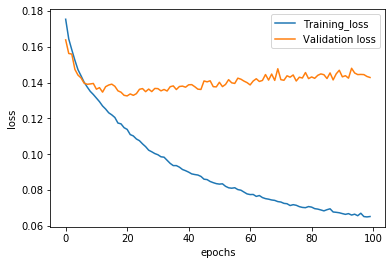

In [42]:
#mean square error
plt.plot(data['loss'],label='Training_loss')
plt.plot(data['val_loss'],label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

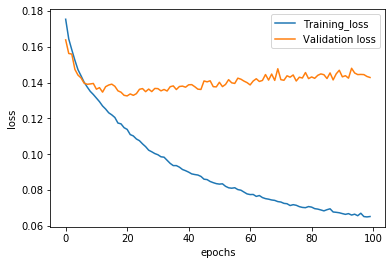

In [43]:
plt.plot(data['mean_absolute_error'],label='Training_loss')
plt.plot(data['val_mean_absolute_error'],label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

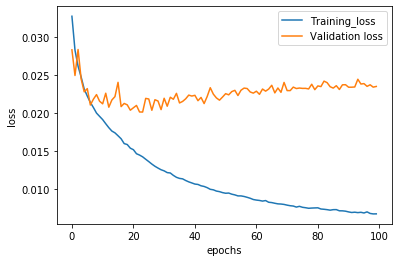

In [44]:
plt.plot(data['mean_squared_logarithmic_error'],label='Training_loss')
plt.plot(data['val_mean_squared_logarithmic_error'],label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
model.save('model_weights/my_stacked_model1.h5')

## TESTING MODEL

In [46]:
data['val_loss'][-1]

0.14285188293444112

In [47]:
min(data['val_loss'])

0.1325718548658149

In [50]:
model.load_weights('model_weights/best_stacked_lstm1.h5')

In [81]:
Y_pred=model.predict(X_emb)

In [82]:
Y_pred=np.asarray(Y_pred[:,0],dtype=float)
Y_train=np.asarray(Y_train,dtype=float)

In [83]:
for i in range(len(lis)):
    print(Y_pred[i]," , ",Y[i])

0.5197736024856567  ,  0.525
0.44290900230407715  ,  0.313973063973064
0.0007694268133491278  ,  0.0
0.000390456902096048  ,  -0.275
-0.07160986959934235  ,  -0.21666666666666667
-0.12375529110431671  ,  -0.125
0.8242719769477844  ,  0.8
0.5988435745239258  ,  0.75
0.1786147952079773  ,  0.5416666666666666
0.5705879330635071  ,  0.6148148148148148
-0.05895199999213219  ,  -0.15357142857142858
0.0032570860348641872  ,  0.0
0.6253775358200073  ,  0.6166666666666667
0.296651691198349  ,  0.17321428571428574
0.00568155013024807  ,  0.0
0.3372887074947357  ,  0.125
0.21277795732021332  ,  -0.10761904761904764
0.028910651803016663  ,  0.0
0.035244010388851166  ,  0.8
0.006635593716055155  ,  0.0
0.0019446715014055371  ,  0.0
-0.0011490484466776252  ,  0.0
0.14261023700237274  ,  0.35
0.00016719101404305547  ,  0.0
-0.14060787856578827  ,  -0.4866666666666666
0.18734093010425568  ,  0.5
0.007952045649290085  ,  0.0
-0.010258040390908718  ,  -0.6
0.22659383714199066  ,  0.2
0.00226406333968043

0.004536221735179424  ,  0.3
0.00022942197392694652  ,  0.016666666666666666
-0.003329907078295946  ,  0.0
0.0005488338647410274  ,  0.0
0.007573602255433798  ,  0.08125
0.19588138163089752  ,  0.1
0.0018677334301173687  ,  -0.2569444444444444
-0.032444991171360016  ,  -0.3
0.009042724967002869  ,  -0.075
0.40601328015327454  ,  0.734375
0.3611854016780853  ,  0.3
0.17210106551647186  ,  0.18181818181818185
0.38960030674934387  ,  0.25
-0.002292244927957654  ,  0.0
0.008375749923288822  ,  0.05833333333333333
0.45891818404197693  ,  0.14583333333333334
0.0036138861905783415  ,  0.21428571428571427
0.21689987182617188  ,  0.125
0.23125077784061432  ,  0.45
0.18278267979621887  ,  0.13333333333333333
0.0022016968578100204  ,  0.0
0.06431156396865845  ,  0.0
0.0028385971672832966  ,  -0.5
0.003500556806102395  ,  0.0
0.14851243793964386  ,  0.10000000000000002
0.0019294482190161943  ,  0.0
0.003197138197720051  ,  0.0
0.021776840090751648  ,  0.0
0.3680247664451599  ,  0.2708333333333333


0.017243385314941406  ,  0.0625
-0.00863782037049532  ,  0.0
-0.0002308468974661082  ,  0.0
0.21284671127796173  ,  0.175
0.0035794260911643505  ,  -0.1
0.46027976274490356  ,  0.6000000000000001
0.029384950175881386  ,  0.0625
0.4560442864894867  ,  0.5
0.0015884240856394172  ,  0.13636363636363635
0.029373157769441605  ,  -0.4318181818181818
0.12442140281200409  ,  0.13636363636363635
0.012485187500715256  ,  -0.2333333333333333
0.4774162471294403  ,  0.016666666666666666
0.007463003043085337  ,  -0.18636363636363634
0.3447568118572235  ,  0.3333333333333333
0.18581309914588928  ,  0.12222222222222222
0.0020728078670799732  ,  0.0
0.06625661998987198  ,  0.0
0.002426436636596918  ,  0.0
-0.004892268683761358  ,  0.04999999999999999
0.003130899975076318  ,  0.0
0.09593062102794647  ,  0.13454545454545455
0.18780894577503204  ,  -0.0888888888888889
-0.017083635553717613  ,  -0.375
0.010423530824482441  ,  0.0
0.0021381790284067392  ,  0.0
0.3448854088783264  ,  0.26666666666666666
-0.0

0.002884759334847331  ,  0.15
0.15429750084877014  ,  0.059090909090909076
0.0016021509654819965  ,  0.0
0.0022022277116775513  ,  0.0
0.0028867048677057028  ,  0.0
0.11033064126968384  ,  0.1
0.0069803511723876  ,  0.0
0.15800537168979645  ,  0.5
0.32792532444000244  ,  0.4053571428571429
-0.0030585334170609713  ,  -0.13333333333333333
0.39219942688941956  ,  0.5
0.0032820452470332384  ,  -0.125
0.0023747377563267946  ,  0.0
0.0017219092696905136  ,  0.2
0.006715255789458752  ,  0.125
0.0013833362609148026  ,  0.25
-0.026655128225684166  ,  -0.1
-0.009049149230122566  ,  -0.0625
-0.0019648103043437004  ,  -0.21666666666666667
0.07233908027410507  ,  0.0
0.2451147437095642  ,  0.25
0.00852241087704897  ,  -0.6
0.02224278450012207  ,  0.0
0.0017518103122711182  ,  0.0
0.02381535805761814  ,  -0.07500000000000001
0.17933930456638336  ,  0.2356770833333333
5.7829540310194716e-05  ,  0.05
0.262594610452652  ,  0.1787878787878788
-0.02798009291291237  ,  -0.07142857142857142
0.4090750813484

0.38420096039772034  ,  0.26666666666666666
0.0005096587119624019  ,  0.0
0.13473422825336456  ,  0.16
0.0030711565632373095  ,  -0.8499999999999999
-0.03348447382450104  ,  -0.3125
0.01328688021749258  ,  -0.07500000000000001
0.08715631067752838  ,  0.08333333333333333
0.3091924488544464  ,  0.25
0.0033064717426896095  ,  0.0
0.0021211509592831135  ,  0.0
0.05207322910428047  ,  0.06875
0.038503196090459824  ,  -0.012500000000000013
0.2483762800693512  ,  0.3
0.004724867641925812  ,  0.4
0.0013607582077383995  ,  0.0
0.016171894967556  ,  0.0
0.004212636966258287  ,  0.2
0.06432496756315231  ,  0.0
0.012806445360183716  ,  0.0
0.0018658549524843693  ,  -0.2
0.0007626840379089117  ,  0.0
0.0028327503241598606  ,  0.5
-0.003534437855705619  ,  0.0
0.07936973124742508  ,  0.04375
0.20800335705280304  ,  0.15625
0.1235714852809906  ,  0.0
-0.0026163416914641857  ,  0.0
-0.034821152687072754  ,  0.0
0.4297308325767517  ,  0.4523809523809524
0.04810559004545212  ,  0.22285714285714286
0.126

0.06964117288589478  ,  0.0
-0.007052358239889145  ,  -0.25
9.710527228889987e-05  ,  0.0
0.25836580991744995  ,  0.3875
0.002619502367451787  ,  0.0
0.00528595270588994  ,  0.25
-0.0018245407845824957  ,  0.0
-0.01618623174726963  ,  -0.09017857142857144
-0.012488585896790028  ,  -0.012499999999999995
0.0002597942657303065  ,  0.0
0.03455250337719917  ,  -0.2908549783549784
0.08844327926635742  ,  0.0
-0.06710033118724823  ,  -0.5
-0.11268605291843414  ,  -0.22291666666666665
0.29379355907440186  ,  0.20454545454545456
0.2470725178718567  ,  0.25416666666666665
0.011083499528467655  ,  0.002499999999999997
0.0013852771371603012  ,  0.0
0.0031022168695926666  ,  0.4291666666666667
0.0026871999725699425  ,  0.0
0.3805401623249054  ,  0.25
-0.03358706459403038  ,  -0.13050426136363635
-0.02479684352874756  ,  -0.25
0.3462497293949127  ,  0.08109090909090907
0.18275880813598633  ,  -0.2318181818181818
0.002092494163662195  ,  0.0
0.06951489299535751  ,  0.16666666666666666
0.2481776028871

0.08581298589706421  ,  0.059971139971139974
0.13684749603271484  ,  0.2575757575757576
0.22154565155506134  ,  -0.018518518518518528
-0.020627280697226524  ,  0.0
0.07335979491472244  ,  0.0
0.0016370958182960749  ,  0.0
0.0031988034024834633  ,  0.2130681818181818
0.003151824465021491  ,  0.0
0.004793958738446236  ,  -0.11428571428571427
0.4470168650150299  ,  0.24204545454545456
0.831138551235199  ,  0.7
-0.0013330791844055057  ,  0.0
0.131904736161232  ,  0.13068181818181818
0.10661599040031433  ,  0.057575757575757565
0.002295100362971425  ,  0.0
0.09907498210668564  ,  -0.03715728715728717
0.24654561281204224  ,  0.28541666666666665
0.004337260499596596  ,  -0.15625
0.37860801815986633  ,  0.675
0.22096559405326843  ,  -0.125
0.004206722602248192  ,  0.0
0.17791803181171417  ,  0.0
0.0024333777837455273  ,  0.0
-0.05050522834062576  ,  -0.04007936507936508
0.0027454718947410583  ,  0.0
0.13801179826259613  ,  0.032467532467532464
0.4802773594856262  ,  0.8
0.012393721379339695  ,

0.3248372972011566  ,  0.0
0.0037307143211364746  ,  0.13636363636363635
0.0031456395518034697  ,  0.0
0.042671605944633484  ,  0.13636363636363635
0.00020918247173540294  ,  -0.01666666666666668
-0.0005377623019739985  ,  -0.075
0.005334877409040928  ,  -0.1555555555555556
0.021645208820700645  ,  -0.2222222222222222
0.00781914871186018  ,  0.0
-0.007430140860378742  ,  0.0
0.24186912178993225  ,  0.2416666666666667
-0.019137153401970863  ,  0.0
0.10134296864271164  ,  0.25
-0.05784710869193077  ,  -0.05
0.012558705173432827  ,  0.0
0.5550107955932617  ,  0.5
0.6468953490257263  ,  0.5681818181818181
-0.008288738317787647  ,  0.0
0.23233255743980408  ,  0.2333333333333334
0.002953475806862116  ,  0.0
0.19512596726417542  ,  -0.25
0.012612607330083847  ,  0.45
0.0020907181315124035  ,  0.3181818181818182
0.12291526049375534  ,  0.0
0.001943184295669198  ,  -0.01339285714285715
0.29370084404945374  ,  0.26666666666666666
0.4700429439544678  ,  0.3121212121212121
0.45220643281936646  ,  

0.41802501678466797  ,  0.8
0.16176235675811768  ,  0.6
0.003044949611648917  ,  0.0
0.0015821255510672927  ,  0.0
0.22401055693626404  ,  0.25
0.04339364916086197  ,  0.09837662337662337
0.21906225383281708  ,  0.16363636363636366
0.04796416684985161  ,  0.4375
-0.008288738317787647  ,  0.0
0.11722216755151749  ,  0.25
-0.010529816150665283  ,  -1.0
0.25244027376174927  ,  0.3125
0.0033320432994514704  ,  0.16666666666666669
0.17843259871006012  ,  0.13636363636363635
0.03382449597120285  ,  -0.06666666666666668
0.786270260810852  ,  0.8
0.008573534898459911  ,  -0.05
-0.005391477607190609  ,  -0.2
0.015525901690125465  ,  0.0
0.2844056785106659  ,  0.25
0.012936989776790142  ,  -0.19444444444444445
0.7547712922096252  ,  0.65
0.021711448207497597  ,  -0.15
0.32700613141059875  ,  0.3181818181818182
0.006291398778557777  ,  -0.3888888888888889
0.007185267750173807  ,  0.0
0.004468221683055162  ,  -0.125
0.414467990398407  ,  0.9765625
-0.016056369990110397  ,  0.0625
0.445502251386642

0.06368225812911987  ,  0.0
0.18877321481704712  ,  0.0
-0.000211328238947317  ,  0.016666666666666666
0.20473246276378632  ,  0.3
0.00673085730522871  ,  0.0
0.007823239080607891  ,  0.0
0.013984126038849354  ,  0.0
0.13840094208717346  ,  0.06193181818181818
-0.09713612496852875  ,  -0.3044871794871795
0.002944298554211855  ,  0.5
0.003691993420943618  ,  -0.125
0.1750204712152481  ,  0.4
0.3678775131702423  ,  0.5
0.13327795267105103  ,  0.175
0.28247958421707153  ,  0.2333333333333333
0.0051645864732563496  ,  0.1097222222222222
0.15800537168979645  ,  0.5
0.11835373938083649  ,  0.13636363636363635
0.002441300544887781  ,  0.0
0.4519122242927551  ,  0.28125
0.0028113077860325575  ,  0.0
0.003333417931571603  ,  0.0
0.0027352687902748585  ,  0.0
0.1394462287425995  ,  0.13636363636363635
0.004462328273802996  ,  0.0
0.3133403956890106  ,  0.1426136363636364
0.001666750991716981  ,  0.0
0.0007097905618138611  ,  0.35
0.18655796349048615  ,  0.14669312169312168
0.056740887463092804  

0.0015760096721351147  ,  0.0
-0.018619494512677193  ,  -0.16666666666666666
0.000692836765665561  ,  0.6
0.25434350967407227  ,  0.017708333333333326
0.11059223115444183  ,  -0.04285714285714288
0.0034247045405209064  ,  0.0
0.0063900393433868885  ,  0.5
0.5945695638656616  ,  0.8
0.09194747358560562  ,  0.3333333333333333
-0.13845138251781464  ,  -0.2
0.002095665317028761  ,  0.0
0.0012620949419215322  ,  -0.5
0.595089316368103  ,  0.5
-0.023631194606423378  ,  -0.13333333333333333
0.005582471378147602  ,  -0.1
0.8117287755012512  ,  0.7
0.23862965404987335  ,  0.3333333333333333
0.5348449945449829  ,  0.402
-0.011529849842190742  ,  -0.2
0.010006532073020935  ,  0.0
0.0002794265456032008  ,  0.0
0.0031865928322076797  ,  0.0
0.19157589972019196  ,  0.14
0.09358018636703491  ,  0.07045454545454546
0.0019665081053972244  ,  0.0
0.022707002237439156  ,  0.0
0.003652583807706833  ,  0.0
0.4660307765007019  ,  0.3825
-0.04498586803674698  ,  -0.04166666666666666
0.8461268544197083  ,  0.

0.0009428668417967856  ,  0.0
0.2542422413825989  ,  -0.1555555555555556
0.0027335365302860737  ,  0.0
0.285948246717453  ,  0.5
0.3250122666358948  ,  0.2833333333333333
0.43235448002815247  ,  0.28125
0.0009428668417967856  ,  0.0
0.0009428668417967856  ,  0.0
0.001735607162117958  ,  0.0
0.13490889966487885  ,  0.28409090909090906
0.4487830400466919  ,  0.4833333333333333
0.0029077716171741486  ,  0.5
0.10787943750619888  ,  0.08484848484848484
-0.0001300740841543302  ,  0.0
0.0007901953649707139  ,  0.0
-0.004252031911164522  ,  0.5
-0.010028524324297905  ,  0.5
-0.00677317613735795  ,  -0.01904761904761904
0.03306853771209717  ,  0.08750000000000001
0.14957614243030548  ,  0.13636363636363635
-0.05056161805987358  ,  -0.21666666666666667
0.08281305432319641  ,  0.1236111111111111
0.07351832836866379  ,  0.2136363636363636
0.625329315662384  ,  0.6000000000000001
0.0037671199534088373  ,  0.5208333333333334
0.8643245697021484  ,  0.85
-0.006095815449953079  ,  -0.022222222222222227

0.1978161633014679  ,  0.0
0.0029734710697084665  ,  0.03888888888888888
-0.007990811951458454  ,  0.0
-0.04648666828870773  ,  -0.0625
0.023414524272084236  ,  0.26666666666666666
0.03508652746677399  ,  0.0
-0.10737012326717377  ,  -0.125
0.3081795275211334  ,  0.4083333333333334
0.1547621786594391  ,  0.2
0.0057920608669519424  ,  0.0
0.0028385971672832966  ,  0.4
0.0031587129924446344  ,  0.0
0.0013325874460861087  ,  0.25
0.0028082747012376785  ,  -0.0625
-0.09658830612897873  ,  0.0
0.0024318252690136433  ,  0.0
0.40616053342819214  ,  0.0
-0.043743375688791275  ,  -0.0625
0.004903383087366819  ,  0.0
-0.004632416646927595  ,  -0.1555555555555556
0.01783188059926033  ,  0.5
0.1541396826505661  ,  -0.05833333333333333
-0.006175522226840258  ,  -0.4000000000000001
0.024423107504844666  ,  0.0
0.011544725857675076  ,  0.26041666666666663
0.0023407824337482452  ,  0.25
0.030385076999664307  ,  0.10000000000000002
0.017672277987003326  ,  0.5625
0.14780926704406738  ,  0.2
0.002735564

0.01699681021273136  ,  0.0
0.0031587129924446344  ,  0.0
-0.043743375688791275  ,  -0.0625
0.27052703499794006  ,  0.4
0.0031587129924446344  ,  0.0
-0.10737012326717377  ,  -0.125
0.002388160675764084  ,  -0.10555555555555557
0.19075702130794525  ,  0.275
0.060176823288202286  ,  0.05583333333333334
0.24037322402000427  ,  0.25
0.23811668157577515  ,  0.21333333333333326
-0.04648666828870773  ,  -0.0625
0.5295408964157104  ,  0.4125
-0.04374339058995247  ,  -0.0625
-0.10721408575773239  ,  -0.125
0.0031587129924446344  ,  0.0
0.0016274921363219619  ,  0.0
-0.10737012326717377  ,  -0.125
0.0026397875044494867  ,  -0.1
-0.1354692578315735  ,  -0.16666666666666666
0.0006081181345507503  ,  0.0
0.11218354851007462  ,  0.10606060606060606
-0.1072140708565712  ,  -0.125
0.0031587129924446344  ,  0.0
0.0031587129924446344  ,  0.0
-0.10737012326717377  ,  -0.125
0.0020733687561005354  ,  0.0
0.027801116928458214  ,  0.0
0.32833752036094666  ,  0.5333333333333333
0.10462916642427444  ,  0.285

-0.004853211808949709  ,  0.0
0.05170179903507233  ,  0.008888888888888884
0.1731487363576889  ,  0.18727272727272729
0.22510485351085663  ,  0.13660714285714287
0.013359968550503254  ,  0.5
-0.03018503077328205  ,  -0.20138888888888887
-0.0008968298207037151  ,  0.0
0.002381599275395274  ,  0.5
0.004000423476099968  ,  0.8
0.0003459844156168401  ,  -0.1555555555555556
0.2903938293457031  ,  0.16875
0.0025131667498499155  ,  0.0
0.4916374087333679  ,  0.4188888888888889
0.006500684656202793  ,  -0.125
0.0025128109846264124  ,  0.0
0.0042715598829090595  ,  0.0
0.024151470512151718  ,  0.0
0.4268088936805725  ,  0.3101128472222222
0.003896037582308054  ,  0.17142857142857146
0.001472239033319056  ,  0.0
0.1685909628868103  ,  0.5066666666666667
0.0013818470761179924  ,  0.009090909090909087
0.0034157228656113148  ,  -0.016666666666666666
-0.003492005867883563  ,  -0.0826388888888889
0.01178903691470623  ,  -0.1
0.0026884572580456734  ,  0.0
-0.03270622342824936  ,  -0.075
0.139692679047

0.0021638059988617897  ,  0.0
0.002537274733185768  ,  0.0
0.023243241012096405  ,  0.012499999999999995
0.24835781753063202  ,  0.25
0.4310431182384491  ,  0.24545454545454545
0.024114692583680153  ,  0.06818181818181818
0.004952606279402971  ,  1.0
0.0029105087742209435  ,  -0.016666666666666666
0.3471367061138153  ,  0.4
0.4299350678920746  ,  0.5
0.0017103907885029912  ,  0.0
0.00447125593200326  ,  0.0
0.0029258846770972013  ,  0.0
0.0074868761003017426  ,  0.0
0.0030454096850007772  ,  0.0
-0.004575171507894993  ,  0.0
0.418389230966568  ,  0.5583333333333333
-0.0009727213182486594  ,  -0.05
0.002189412945881486  ,  0.175
0.1414196491241455  ,  0.125
0.04560668021440506  ,  0.5
0.002400493947789073  ,  0.0
0.07519756257534027  ,  0.06818181818181818
0.6282333731651306  ,  1.0
0.0023450099397450686  ,  0.0
0.02627863734960556  ,  0.03333333333333335
0.10528896749019623  ,  0.10000000000000002
0.0006676296470686793  ,  0.0
0.011485281400382519  ,  -0.1555555555555556
0.486728161573

0.0027467282488942146  ,  0.6
0.006550285033881664  ,  0.0
0.1720818430185318  ,  0.2
0.005277654621750116  ,  0.0
-0.0034870512317866087  ,  -0.125
0.0027217348106205463  ,  0.0
0.36528438329696655  ,  0.08958333333333332
0.022650014609098434  ,  0.08333333333333333
0.2934459447860718  ,  0.25
0.18135908246040344  ,  0.3125
-0.03215084969997406  ,  -0.2
0.002016514539718628  ,  0.0
0.12466280907392502  ,  0.075
0.3293530344963074  ,  0.2
0.13673865795135498  ,  0.14464285714285716
-0.00022522358631249517  ,  0.5
0.48582732677459717  ,  1.0
-0.022798383608460426  ,  -0.010416666666666656
0.0031298792455345392  ,  0.0
-0.008395352400839329  ,  0.5523809523809524
-0.007144993636757135  ,  0.09166666666666666
0.2756436765193939  ,  0.25999999999999995
0.0449511855840683  ,  0.31904761904761897
0.0005051958141848445  ,  0.0
0.38453370332717896  ,  0.4
0.1188301295042038  ,  0.14545454545454548
0.2554948329925537  ,  0.2225
0.002341583603993058  ,  0.0
0.20981766283512115  ,  -0.04254971590

0.008156909607350826  ,  0.0
-0.10290109366178513  ,  -0.3333333333333333
0.0020554044749587774  ,  0.0
0.11506528407335281  ,  0.1409090909090909
0.022302379831671715  ,  0.0
0.0008183082100003958  ,  0.0
0.33534476161003113  ,  0.4
0.00014275497233029455  ,  0.0
0.22608555853366852  ,  0.21212121212121213
0.21604205667972565  ,  0.21212121212121213
0.21915073692798615  ,  0.375
0.18778711557388306  ,  0.16999999999999998
-0.011506226845085621  ,  -0.36458333333333337
0.0017795198364183307  ,  0.0
0.0038404418155550957  ,  0.0
0.0015208522090688348  ,  0.0
-0.002163749188184738  ,  0.0
0.2194734811782837  ,  0.2272727272727273
0.15981681644916534  ,  0.02878787878787877
0.12677310407161713  ,  0.2
0.1978856772184372  ,  0.2
0.19719929993152618  ,  0.4
0.2409726232290268  ,  0.14444444444444446
-0.001774178701452911  ,  -0.05185185185185186
-0.0003072730905842036  ,  -0.2
0.007142676971852779  ,  0.5
0.3256605565547943  ,  0.15208333333333332
0.002764729782938957  ,  -0.714285714285714

0.001842412748374045  ,  0.0
-0.06672143191099167  ,  -0.125
0.0024806729052215815  ,  0.1025
0.0007626840379089117  ,  0.0
-0.00024216060410253704  ,  0.0
0.1373458057641983  ,  0.4
0.18718042969703674  ,  0.5
0.2773291766643524  ,  0.35625
0.00240263226442039  ,  0.2
0.042403362691402435  ,  0.2
0.1542343944311142  ,  0.25
0.12226996570825577  ,  0.1590909090909091
-0.03933359682559967  ,  -0.5
0.14129050076007843  ,  -0.21875
0.10839871317148209  ,  0.012121212121212116
0.11480115354061127  ,  0.2681818181818182
0.006079580169171095  ,  0.0
0.14713701605796814  ,  0.1431818181818182
-0.04263345152139664  ,  -0.125
0.0005303974030539393  ,  0.0
0.29279884696006775  ,  0.4
0.5396787524223328  ,  0.5
0.003897732589393854  ,  -0.03181818181818183
0.003766963491216302  ,  -0.1555555555555556
0.0033270842395722866  ,  0.0
-0.003083766670897603  ,  -0.5
0.015036067925393581  ,  0.2272727272727273
0.518918514251709  ,  0.43333333333333335
0.1096198558807373  ,  0.1
0.1096198558807373  ,  0.

-0.002954699331894517  ,  -0.025
0.0031587129924446344  ,  0.0
-0.10255269706249237  ,  -0.125
-0.003902176860719919  ,  0.0
-0.0027078227140009403  ,  -0.1111111111111111
0.0028312511276453733  ,  0.0
0.30338054895401  ,  0.225
0.001655427971854806  ,  -0.4
0.2630316913127899  ,  0.25
-0.00640378100797534  ,  0.025
-0.009448076598346233  ,  0.0
0.0028385971672832966  ,  -0.125
0.00235888478346169  ,  -0.125
-0.04648666828870773  ,  -0.0625
0.008730296976864338  ,  -0.325
-0.043743375688791275  ,  -0.0625
-0.1072140708565712  ,  -0.125
-0.0997798964381218  ,  -0.125
-0.011592286638915539  ,  0.0
-0.043743375688791275  ,  -0.0625
0.004157165065407753  ,  0.1875
-0.0997798964381218  ,  -0.125
0.0031587129924446344  ,  0.0
-0.10255269706249237  ,  -0.125
-0.10737012326717377  ,  -0.125
0.004131142515689135  ,  0.0
0.0018962838221341372  ,  0.2
0.011825322173535824  ,  0.0
-0.1047557070851326  ,  -0.125
-0.04648666828870773  ,  -0.0625
0.05815844237804413  ,  0.4285714285714286
0.077182315

0.31130629777908325  ,  0.375
-0.1696304976940155  ,  -0.2916666666666667
0.009177489206194878  ,  0.016666666666666663
0.27036985754966736  ,  0.7
-0.005643901880830526  ,  0.0
0.04476591944694519  ,  0.02187500000000001
0.004477234557271004  ,  0.0
0.003322326112538576  ,  0.0
0.001338316942565143  ,  0.0
0.003711004974320531  ,  0.0
0.0029834958259016275  ,  0.0
0.48067158460617065  ,  0.4166666666666667
0.016407731920480728  ,  0.0
0.018856685608625412  ,  -0.43333333333333335
0.18696364760398865  ,  0.0
0.007369635161012411  ,  0.0
0.4338141977787018  ,  0.6000000000000001
0.0031955947633832693  ,  -0.6
0.3086448609828949  ,  0.2681818181818182
0.17282430827617645  ,  -0.0666666666666667
0.3686811029911041  ,  0.44642857142857145
-0.03257239982485771  ,  0.13333333333333333
0.001014447188936174  ,  0.0
-0.005081616807729006  ,  0.0
0.005286869127303362  ,  -0.09166666666666667
0.10366318374872208  ,  -0.33181818181818185
0.15368784964084625  ,  0.375
0.48949840664863586  ,  0.4
0.

0.18940125405788422  ,  -0.25
0.0018188299145549536  ,  0.0
0.053672969341278076  ,  0.13636363636363635
-0.0912485420703888  ,  -0.125
0.0009357012459076941  ,  0.0
0.0020060893148183823  ,  0.0
-0.0002284329239046201  ,  0.5
0.20136533677577972  ,  0.4418244949494949
0.5501116514205933  ,  0.65
0.009331787005066872  ,  0.5
0.46813908219337463  ,  0.3538888888888889
-0.0031317011453211308  ,  0.0
-0.029625339433550835  ,  0.0
-0.0008529160404577851  ,  -0.05
0.0034761582501232624  ,  -0.5
0.00737732881680131  ,  0.0
0.0024113624822348356  ,  0.0
0.002860796870663762  ,  0.0
0.09928524494171143  ,  0.13636363636363635
0.35792282223701477  ,  0.3333333333333333
0.503807783126831  ,  0.3333333333333333
0.0056634326465427876  ,  0.0
0.0026596535462886095  ,  0.0
0.002754508750513196  ,  1.0
0.02798687107861042  ,  0.1
0.06262435019016266  ,  0.2714285714285714
0.0342334508895874  ,  -0.04375
0.0027234298177063465  ,  0.0
0.0639207661151886  ,  0.17045454545454544
0.5126364231109619  ,  0.

0.11409113556146622  ,  0.28750000000000003
0.004874398000538349  ,  0.0
-0.041585277765989304  ,  -0.06
0.05840323492884636  ,  0.13636363636363635
-0.0005307419924065471  ,  -0.75
0.14583365619182587  ,  0.0
0.0006252973107621074  ,  0.0
-0.0049322787672281265  ,  0.0
0.43639978766441345  ,  0.375
0.1903664767742157  ,  0.4121212121212121
0.15561094880104065  ,  0.1340909090909091
0.013329531066119671  ,  -0.1
0.07519756257534027  ,  0.06818181818181818
0.005395437590777874  ,  0.05
0.03510429710149765  ,  0.05833333333333333
-0.002862069057300687  ,  -0.006397306397306411
0.17386901378631592  ,  0.09375
0.12104805558919907  ,  0.2
-0.009948757477104664  ,  0.0
-0.009948757477104664  ,  0.0
0.18433135747909546  ,  0.06818181818181818
0.01535476092249155  ,  0.13636363636363635
0.15593406558036804  ,  0.165625
-0.0017601118888705969  ,  0.0
0.003193313255906105  ,  0.2857142857142857
0.43932557106018066  ,  0.4772727272727272
0.001606233767233789  ,  0.0
-0.043743375688791275  ,  -0.0

0.7090666890144348  ,  1.0
-0.002266237046569586  ,  0.0
0.4859306812286377  ,  0.4
0.004073553252965212  ,  0.0
0.005094460211694241  ,  0.0
0.14289894700050354  ,  0.3
0.017749758437275887  ,  0.0
0.0040314095094799995  ,  0.0
0.01140660047531128  ,  0.0
0.30000561475753784  ,  0.25
0.05056158825755119  ,  0.0
-0.005358418915420771  ,  0.0
-0.014839539304375648  ,  0.0
0.0017276628641411662  ,  0.0
-0.00170135498046875  ,  0.0
0.2911302447319031  ,  0.2
0.06116996705532074  ,  0.8
0.5150279402732849  ,  0.4666666666666666
0.2321978062391281  ,  0.22916666666666666
0.23133130371570587  ,  0.2
0.239464670419693  ,  0.08
-0.08226972073316574  ,  -1.0
0.2579084038734436  ,  0.325
-0.003467636415734887  ,  0.1875
0.00464303232729435  ,  0.0
0.005014176946133375  ,  0.5
0.24498620629310608  ,  0.14015151515151514
0.32347631454467773  ,  0.5375000000000001
0.049211278557777405  ,  0.006666666666666668
0.2840249240398407  ,  0.27878787878787875
0.0018217692850157619  ,  0.0
0.532744526863098

0.4704391658306122  ,  0.4674285714285714
0.0002700462646316737  ,  0.0
0.010231277905404568  ,  0.090625
0.3932585120201111  ,  0.5
0.806612491607666  ,  1.0
0.15838231146335602  ,  0.18095238095238095
0.8010302782058716  ,  1.0
0.03438465669751167  ,  0.0
0.002303294138982892  ,  0.0
0.17875239253044128  ,  0.13636363636363635
-0.026387907564640045  ,  0.0
-0.01568738929927349  ,  -0.19583333333333336
0.0001448932889616117  ,  0.35
0.003071080194786191  ,  0.0
0.3484914302825928  ,  0.3
0.2977186441421509  ,  0.2856481481481481
0.002280761953443289  ,  0.0
-0.041585277765989304  ,  -0.06
0.004746114369481802  ,  -0.2
0.48986777663230896  ,  0.45
0.36724600195884705  ,  0.46
0.009995701722800732  ,  0.0
0.0033677287865430117  ,  0.0
0.5034773349761963  ,  0.4
0.0574473962187767  ,  0.1
-0.0015764071140438318  ,  0.0
0.0026086349971592426  ,  0.0
0.001139534986577928  ,  0.0
0.7588592171669006  ,  0.6
-0.012199853546917439  ,  -0.1
0.5310315489768982  ,  0.25
0.01638965867459774  ,  0.

0.0121467849239707  ,  0.0
0.002307780319824815  ,  0.0
-0.0004112664028070867  ,  0.0
0.006608671974390745  ,  0.0
0.4066198468208313  ,  0.3958333333333333
0.07805313915014267  ,  0.15416666666666667
0.0006271506426855922  ,  -0.2
0.3304655849933624  ,  0.3
0.16590294241905212  ,  0.2
0.0016197043005377054  ,  0.10000000000000002
0.8802521824836731  ,  1.0
0.2975468039512634  ,  0.0
0.038367558270692825  ,  0.13636363636363635
0.05188580974936485  ,  0.078125
-0.0022110585123300552  ,  0.0
0.31810465455055237  ,  0.4
-0.0036058698315173388  ,  0.0
0.47935551404953003  ,  0.5
0.001644283882342279  ,  0.0
0.0035398544277995825  ,  0.4166666666666667
0.24744915962219238  ,  0.2125
0.0033208350650966167  ,  0.0
0.324752539396286  ,  0.1122159090909091
0.2312508076429367  ,  0.45
-0.0260916855186224  ,  0.0
0.17522022128105164  ,  0.125
0.015394944697618484  ,  0.0
0.20181028544902802  ,  0.2272727272727273
0.5057331919670105  ,  0.5
0.1762792021036148  ,  0.15625
0.005102512426674366  , 

0.001984710805118084  ,  0.0
0.06027356907725334  ,  0.05
0.26002857089042664  ,  0.15
-0.0015382639830932021  ,  0.0
0.053805116564035416  ,  0.05
-0.0021638423204421997  ,  0.0
0.003631580388173461  ,  0.0
0.11865396052598953  ,  0.2
0.0022535151802003384  ,  0.0
0.001292465371079743  ,  0.0
0.22244441509246826  ,  0.125
0.005175311584025621  ,  0.0
-0.001628782832995057  ,  -0.1111111111111111
-1.3450158803607337e-05  ,  0.0
-0.026005009189248085  ,  0.15
0.001769201597198844  ,  0.0
-0.004362727981060743  ,  0.0
0.002610211493447423  ,  -0.2
0.4100712835788727  ,  -0.0625
0.0016095893224701285  ,  -0.2
0.030205819755792618  ,  0.016666666666666666
0.6980265974998474  ,  0.5
0.2330467253923416  ,  0.25
-0.017921898514032364  ,  0.0
0.05666324123740196  ,  0.13636363636363635
0.06486611813306808  ,  0.14
0.15891368687152863  ,  0.3333333333333333
0.0017725832294672728  ,  0.0
0.0024323812685906887  ,  0.0
-0.0004387925146147609  ,  0.016666666666666663
0.022712448611855507  ,  0.2
0.

-0.005286451894789934  ,  -0.0625
0.0026932107284665108  ,  0.0
0.15545840561389923  ,  0.18333333333333332
-0.000640859710983932  ,  0.0
0.0010090158320963383  ,  0.0
-0.22587977349758148  ,  -0.43333333333333335
-0.11578475683927536  ,  -0.16388888888888892
0.12143462151288986  ,  0.0
0.07164546102285385  ,  0.10317460317460317
0.004906923975795507  ,  0.0
0.025175215676426888  ,  -0.04583333333333334
0.11720683425664902  ,  0.13636363636363635
0.008190897293388844  ,  0.0
0.36459431052207947  ,  0.3
0.38004159927368164  ,  0.481060606060606
-0.011883854866027832  ,  0.0
0.0462917797267437  ,  0.06666666666666668
0.03228041157126427  ,  0.22000000000000006
0.2174677550792694  ,  0.3
0.013256572186946869  ,  0.0
-0.02388746477663517  ,  -0.25
0.2330467253923416  ,  0.25
0.0013327309861779213  ,  0.0
0.003599531017243862  ,  0.0
0.01976177468895912  ,  0.125
0.001762160798534751  ,  0.0
-0.003089337842538953  ,  0.0
0.1827085316181183  ,  0.6
0.000684981991071254  ,  0.0
0.154348075389

0.7586881518363953  ,  0.6666666666666666
-0.043743375688791275  ,  -0.0625
0.0031587129924446344  ,  0.0
0.0028099464252591133  ,  0.0
0.004525307100266218  ,  0.375
0.1744515597820282  ,  0.4270833333333333
0.0034707090817391872  ,  0.0
0.0056947567500174046  ,  0.0
0.0009869164787232876  ,  0.0
0.0032059045042842627  ,  0.0
0.21402490139007568  ,  0.26666666666666666
-0.04648666828870773  ,  -0.0625
0.0014713095733895898  ,  -0.1125
-0.043743375688791275  ,  -0.0625
0.0028385971672832966  ,  -0.125
0.0028099464252591133  ,  0.0
0.004940081387758255  ,  0.0
0.0022331997752189636  ,  0.0
-0.11893133819103241  ,  -0.125
0.13114593923091888  ,  0.13636363636363635
0.5814324021339417  ,  0.3972727272727273
0.007749577518552542  ,  0.25
0.003158717881888151  ,  0.0
0.11056742817163467  ,  0.2833333333333334
0.0031587129924446344  ,  0.0
-0.11893133819103241  ,  -0.125
0.002076918724924326  ,  0.14583333333333334
0.2345508188009262  ,  0.24285714285714285
0.004363238345831633  ,  0.0
0.000

0.05039538815617561  ,  0.5
0.0028258669190108776  ,  0.15
-0.0007710026111453772  ,  0.0
0.004983111284673214  ,  0.0
0.0026596535462886095  ,  0.0
0.0007734762039035559  ,  0.0
0.41404134035110474  ,  0.5
0.0029431157745420933  ,  0.0
0.0448031947016716  ,  0.13333333333333333
0.1715095341205597  ,  0.15
0.0006985010695643723  ,  -0.052777777777777785
-0.09058737754821777  ,  -0.4
0.022727955132722855  ,  0.0
-0.0027493666857481003  ,  -0.16666666666666666
0.4862549602985382  ,  0.45
0.7586881518363953  ,  0.6666666666666666
0.28466060757637024  ,  0.378125
0.0007671730127185583  ,  0.0
0.27903860807418823  ,  0.275
0.0032258382998406887  ,  0.0
0.2777288556098938  ,  0.375
0.001761317253112793  ,  0.325
0.251946359872818  ,  0.15000000000000002
0.0012742375256493688  ,  0.0
0.005418334621936083  ,  0.03333333333333333
0.08388368040323257  ,  0.0
0.0023638494312763214  ,  0.0
0.22839400172233582  ,  0.425
-0.003800617530941963  ,  0.28750000000000003
0.17189209163188934  ,  0.0725000

0.004605083726346493  ,  0.005681818181818178
0.4839034378528595  ,  0.5
0.002877450780943036  ,  0.005681818181818178
0.4839034378528595  ,  0.5
0.08177252113819122  ,  0.0
0.0035769338719546795  ,  0.005681818181818178
0.0015162775525823236  ,  0.0
0.38779810070991516  ,  0.33
-0.041603222489356995  ,  -0.12962962962962962
0.0028693072963505983  ,  0.2375
0.43221315741539  ,  0.625
0.6764499545097351  ,  0.46
0.0002988017804455012  ,  0.0
0.04811388626694679  ,  0.05056818181818182
0.003277626121416688  ,  0.0
0.4720630645751953  ,  0.6454545454545455
0.0021173825953155756  ,  0.0
0.22603273391723633  ,  -0.18750000000000008
0.14886710047721863  ,  0.0
0.019756508991122246  ,  0.1875
0.0014288340462371707  ,  0.0
0.008508247323334217  ,  0.625
0.000355338619556278  ,  0.0
0.36347439885139465  ,  0.625
0.16139179468154907  ,  0.2
0.1832982301712036  ,  0.2857142857142857
0.7224195599555969  ,  0.8
0.14545656740665436  ,  0.2625
0.1392638236284256  ,  0.1875
0.0031229001469910145  ,  0

0.0002988017804455012  ,  0.0
0.001216229284182191  ,  0.0
-0.008830533362925053  ,  0.4785714285714286
0.13921359181404114  ,  0.07777777777777778
0.31046560406684875  ,  0.25
0.13694196939468384  ,  0.1
0.11504054069519043  ,  0.06628787878787877
0.028860077261924744  ,  0.08611111111111111
0.001411314820870757  ,  0.1
0.15177392959594727  ,  0.13636363636363635
0.01738544926047325  ,  0.26666666666666666
0.21356895565986633  ,  0.3
0.8587304949760437  ,  0.7
0.14471469819545746  ,  0.13636363636363635
0.018368488177657127  ,  0.13636363636363635
0.0008352117147296667  ,  0.0
0.4307279884815216  ,  0.5
0.32452166080474854  ,  0.2375
0.4482726752758026  ,  0.513474025974026
-0.003245759289711714  ,  0.0
0.06063405051827431  ,  0.7
0.24730288982391357  ,  0.34375
0.006335172336548567  ,  0.1
0.20424023270606995  ,  0.31666666666666665
0.003037773771211505  ,  0.0
-0.09345979243516922  ,  -0.1953125
0.0027946913614869118  ,  0.0
0.002380962483584881  ,  0.0
0.005769974552094936  ,  0.0


0.0022305063903331757  ,  0.05
0.01778334751725197  ,  0.0
0.6775476932525635  ,  0.28
0.0037095858715474606  ,  0.0
-0.001230380730703473  ,  0.0
0.823112428188324  ,  0.85
0.09775811433792114  ,  0.4
0.0025317221879959106  ,  0.0
0.20188507437705994  ,  0.2
0.0028385971672832966  ,  0.0
0.46121105551719666  ,  0.22916666666666666
0.012250338681042194  ,  0.0
0.8766644597053528  ,  0.7
0.30495718121528625  ,  0.18434343434343434
0.1236230656504631  ,  0.3121212121212121
0.007653721608221531  ,  -0.03055555555555556
0.16294996440410614  ,  0.21212121212121213
0.6676278710365295  ,  1.0
0.14498132467269897  ,  0.18333333333333332
0.03523426875472069  ,  0.016666666666666666
0.878770649433136  ,  0.8
0.0023769447579979897  ,  0.0
0.002269178396090865  ,  -0.5
0.0033320202492177486  ,  0.0
-0.02053174562752247  ,  -0.25
0.0007461773348040879  ,  0.0
-0.0009016224066726863  ,  0.2375
0.22019080817699432  ,  0.16666666666666669
0.2067461460828781  ,  0.0
0.10950488597154617  ,  0.0750000000

0.002987951273098588  ,  0.0
0.003044172888621688  ,  0.0
0.10597928613424301  ,  0.31666666666666665
0.022906923666596413  ,  -9.251858538542969e-18
0.15643835067749023  ,  0.013095238095238113
0.2275310903787613  ,  0.13636363636363635
0.26071715354919434  ,  0.29375
-0.0008614786202087998  ,  0.0
-0.003168208757415414  ,  0.0
0.16271384060382843  ,  0.3333333333333333
0.028014615178108215  ,  -0.04166666666666666
0.3872103691101074  ,  0.25
0.002612778451293707  ,  -0.26041666666666663
-0.003405753057450056  ,  0.0
0.006332701537758112  ,  0.0
0.0050101797096431255  ,  0.390625
0.41070249676704407  ,  0.35714285714285715
0.497870534658432  ,  0.125
0.019108274951577187  ,  0.3125
0.004100859630852938  ,  0.0
0.19813214242458344  ,  0.1787878787878788
0.003175977850332856  ,  0.0
0.002339552156627178  ,  0.0
0.002441359218209982  ,  0.0
0.0006927641807124019  ,  0.0
0.003457438899204135  ,  0.0
0.21775105595588684  ,  0.1787878787878788
0.1281316578388214  ,  0.003333333333333321
0.0

0.004215321037918329  ,  0.0
0.1721881926059723  ,  -0.005208333333333336
0.18923623859882355  ,  0.25
0.0033071355428546667  ,  0.0
-0.0028521951753646135  ,  0.3
0.0024169208481907845  ,  0.475
0.00547162676230073  ,  0.35714285714285715
0.316184401512146  ,  0.2703125
-0.002949437825009227  ,  0.0
0.001454490120522678  ,  0.0
0.03600873798131943  ,  0.0
0.11228972673416138  ,  0.16
-0.002831695368513465  ,  0.13
0.026782384142279625  ,  0.0
0.0027721826918423176  ,  0.0
-0.005721063353121281  ,  0.0
0.27135640382766724  ,  0.2333333333333333
0.014273342676460743  ,  0.21875
0.0027721826918423176  ,  0.0
-0.0028022918850183487  ,  0.0
0.00277519878000021  ,  0.0
0.13735496997833252  ,  0.13636363636363635
0.00307441339828074  ,  0.0
0.11124993860721588  ,  0.0
0.02522832341492176  ,  0.08333333333333333
0.008677695877850056  ,  0.0
0.0024140356108546257  ,  0.0
0.005802216473966837  ,  0.0
0.0018564439378678799  ,  0.0
0.0024941698648035526  ,  0.0
0.3924402594566345  ,  0.425
-0.023

0.16854950785636902  ,  -0.2
0.05790209770202637  ,  0.35
0.0014200498117133975  ,  0.0
0.15029150247573853  ,  0.20272727272727276
-0.03273589536547661  ,  -0.1555555555555556
0.32107290625572205  ,  0.375
0.006691147573292255  ,  0.0
0.29927217960357666  ,  0.25
0.013942639343440533  ,  0.0
0.02488647773861885  ,  -0.034523809523809526
0.0002988017804455012  ,  0.0
0.5428031086921692  ,  0.5
0.31450849771499634  ,  0.5
-0.008523720316588879  ,  0.0
0.02884756773710251  ,  -0.13333333333333333
-5.1170583901694044e-05  ,  -0.05
0.13588981330394745  ,  0.13636363636363635
0.002074072603136301  ,  0.0
0.0015441071009263396  ,  0.0
0.0787031278014183  ,  0.0
0.2938598096370697  ,  0.125
0.5090795159339905  ,  0.4083333333333334
0.0027804216369986534  ,  0.0
0.11810152977705002  ,  0.0909090909090909
0.17944464087486267  ,  0.16818181818181818
0.0032971417531371117  ,  0.0
-0.11324209719896317  ,  -0.23541666666666666
0.11683308333158493  ,  0.12999999999999998
0.004919799976050854  ,  0.0

0.3734506666660309  ,  0.5
-0.0014879951486364007  ,  0.0
-0.003360981121659279  ,  0.0
-0.041585277765989304  ,  -0.06
0.8527685403823853  ,  0.7333333333333334
0.0028385971672832966  ,  0.0
0.027130739763379097  ,  0.0
0.06129926070570946  ,  0.0106060606060606
0.007538981270045042  ,  0.0
0.007538981270045042  ,  0.0
0.007538981270045042  ,  0.0
0.14036522805690765  ,  0.0
0.005724944639950991  ,  0.0
0.010863983072340488  ,  0.5
-0.0012025025207549334  ,  -0.5
0.2693614363670349  ,  0.2990909090909091
0.10973576456308365  ,  0.0
0.04003174230456352  ,  0.1875
0.10477861016988754  ,  0.2333333333333333
0.06573468446731567  ,  0.0
0.0016294153174385428  ,  -0.1875
0.0009194329613819718  ,  0.25
0.00677220756188035  ,  0.0
-0.004762817639857531  ,  0.08285714285714285
0.003550836583599448  ,  0.32
0.0033086957409977913  ,  0.0
0.005241056904196739  ,  0.0
0.0016777776181697845  ,  -0.1
0.0021350926253944635  ,  0.1
0.6607678532600403  ,  0.3333333333333333
0.3734310269355774  ,  0.135

0.021489959210157394  ,  0.0
0.10622025281190872  ,  0.06818181818181818
0.47835585474967957  ,  0.6
0.0007180271204560995  ,  0.0
0.4629872441291809  ,  0.5
0.004651810973882675  ,  0.0
0.1247207373380661  ,  0.13636363636363635
0.005080912262201309  ,  0.21393939393939396
-0.005930817686021328  ,  -0.125
0.1666516363620758  ,  0.37083333333333335
0.0013844752684235573  ,  0.3208333333333333
0.02137027680873871  ,  0.0
0.12916260957717896  ,  0.2333333333333333
0.43117833137512207  ,  0.0
0.016648516058921814  ,  0.0
0.23301829397678375  ,  0.4
0.2864397168159485  ,  0.2877777777777778
0.0044088661670684814  ,  0.0
0.016018668189644814  ,  0.06818181818181818
0.31567811965942383  ,  0.5
0.4357498586177826  ,  0.3
0.008720600977540016  ,  0.0
0.29077425599098206  ,  0.3333333333333333
0.0067137302830815315  ,  -0.018518518518518528
0.3752813935279846  ,  0.30000000000000004
0.14342252910137177  ,  0.494140625
0.18744920194149017  ,  1.0
0.2663378119468689  ,  0.3416666666666666
0.33631

0.0033074121456593275  ,  0.4866666666666667
0.002402698388323188  ,  0.0
0.053689152002334595  ,  0.125
0.04024540260434151  ,  -0.1555555555555556
-0.001264331047423184  ,  0.0
0.04024540260434151  ,  -0.1555555555555556
0.003005681559443474  ,  0.0
0.0011018275981768966  ,  0.0
-0.04427388310432434  ,  -0.019196428571428583
0.002935123397037387  ,  0.2
0.23373644053936005  ,  0.25
-0.1142185777425766  ,  -0.15714285714285714
0.11793255805969238  ,  0.5
0.0009209994459524751  ,  0.13636363636363635
0.011017503216862679  ,  -0.10000000000000002
-0.00570447463542223  ,  0.0
0.0028121040668338537  ,  0.003787878787878785
0.1562361717224121  ,  0.1571969696969697
0.09105075150728226  ,  0.1787878787878788
0.7534460425376892  ,  0.3
0.34316983819007874  ,  0.3
0.23672360181808472  ,  0.2
0.18695473670959473  ,  0.19583333333333333
0.0019491101847961545  ,  0.1
0.5556370615959167  ,  0.3541666666666667
0.010396359488368034  ,  0.375
0.08874180912971497  ,  0.15284090909090908
0.44918337464

0.004220715258270502  ,  0.0
0.029943019151687622  ,  0.06818181818181818
0.19940200448036194  ,  0.2671428571428571
0.006187647581100464  ,  0.25
0.003093329258263111  ,  0.25
0.002650005044415593  ,  -0.5
0.458748996257782  ,  0.13333333333333333
0.15614163875579834  ,  0.0
0.0038783010095357895  ,  0.0
0.000100711353297811  ,  0.0
0.4702621400356293  ,  0.4666666666666666
0.003097708337008953  ,  0.5
0.06201113387942314  ,  -0.1
0.4312811493873596  ,  0.0
0.004951151553541422  ,  0.0
0.2425561547279358  ,  0.22
0.10967195779085159  ,  -0.05972222222222221
-0.005797713529318571  ,  0.0
0.013382901437580585  ,  0.0
0.007711481302976608  ,  0.0
0.0038014038000255823  ,  0.0
0.1685313582420349  ,  0.12272727272727275
0.01923161931335926  ,  0.375
0.0029539030510932207  ,  0.0
0.3344053626060486  ,  0.525
0.000971661473158747  ,  0.4375
0.044844094663858414  ,  0.175
0.0056525347754359245  ,  1.0
0.38353875279426575  ,  0.5
0.013900481164455414  ,  0.2299242424242424
-0.19923695921897888

0.0009637023322284222  ,  0.0
0.00043163439841009676  ,  0.0
0.09268658608198166  ,  0.08333333333333333
0.2971976697444916  ,  0.27142857142857146
0.0014642837923020124  ,  0.0
0.000414715992519632  ,  0.0
0.1908242106437683  ,  0.25
0.5065127611160278  ,  0.6333333333333333
0.0020236605778336525  ,  0.0
0.000688426080159843  ,  0.26
0.0025096882600337267  ,  0.0
0.36884647607803345  ,  0.5681818181818181
0.1495683491230011  ,  0.06818181818181818
0.005064788274466991  ,  0.0
0.0029140478000044823  ,  -1.0
0.016543379053473473  ,  -0.026984126984127
0.0028220689855515957  ,  0.65625
0.3828190267086029  ,  0.39
0.12767140567302704  ,  0.13636363636363635
0.21550573408603668  ,  0.3
0.004362176638096571  ,  0.0
0.004265031311661005  ,  0.0
0.0029848518315702677  ,  -0.07777777777777779
0.004762890283018351  ,  0.14814814814814814
-0.000938169367145747  ,  0.03333333333333333
0.14170044660568237  ,  0.5
0.17405124008655548  ,  0.55
0.14432884752750397  ,  0.1
0.011911388486623764  ,  -0.

0.0010048444382846355  ,  -0.15555555555555556
0.14480946958065033  ,  0.13636363636363635
0.0580107681453228  ,  0.0
0.6218443512916565  ,  0.0625
0.0029818920884281397  ,  0.0
0.027138425037264824  ,  0.0
-0.0012356315273791552  ,  -0.06666666666666668
0.0010108775459229946  ,  0.12222222222222225
0.11656893789768219  ,  0.0
0.0960443988442421  ,  -0.2
0.000936716387514025  ,  0.0
0.0024132307153195143  ,  0.2125
0.013574416749179363  ,  0.0
0.001650033867917955  ,  0.17777777777777778
0.144262433052063  ,  0.13636363636363635
0.35383930802345276  ,  0.0
0.008411942981183529  ,  -0.25
0.0034848139621317387  ,  0.0
0.002737749367952347  ,  0.35
0.011068310588598251  ,  -0.6
0.002641714410856366  ,  0.10000000000000002
0.020359227433800697  ,  0.003787878787878785
0.41011860966682434  ,  0.10416666666666666
0.003480354091152549  ,  0.25
-0.10158032178878784  ,  -0.45
0.37479910254478455  ,  0.3333333333333333
0.0009179838234558702  ,  0.0
0.00524307694286108  ,  0.0
0.8063936829566956 

0.011049773544073105  ,  0.1
0.004066049586981535  ,  0.5
0.13510151207447052  ,  0.13636363636363635
0.19048739969730377  ,  0.2375
0.47463536262512207  ,  0.85
-0.019237607717514038  ,  -0.047619047619047616
0.06206520274281502  ,  0.0
0.8657885193824768  ,  0.9
-0.002188913756981492  ,  0.016666666666666666
0.30437466502189636  ,  0.37142857142857133
0.015324895270168781  ,  0.13636363636363635
0.41872701048851013  ,  0.18522727272727274
0.0030887324828654528  ,  0.0
0.325793981552124  ,  0.7
0.11436141282320023  ,  0.5583333333333333
0.042626213282346725  ,  0.25
1.3748182936978992e-05  ,  0.0
-0.005400863476097584  ,  -0.125
0.10552788525819778  ,  0.3
0.003518821904435754  ,  0.5
0.0036658141762018204  ,  0.13636363636363635
0.36397626996040344  ,  0.0
0.002058011246845126  ,  -0.05
0.0033563990145921707  ,  0.0
0.6269801259040833  ,  -0.5625
0.7925326228141785  ,  0.2793560606060606
0.007854392752051353  ,  0.5416666666666666
0.0028385971672832966  ,  0.13636363636363635
0.00432

0.0033972475212067366  ,  -0.05416666666666666
0.5626956820487976  ,  0.375
0.12760068476200104  ,  0.13636363636363635
0.0099790683016181  ,  -0.1111111111111111
0.0010194401256740093  ,  0.0
0.0026662638410925865  ,  0.0
0.3705776333808899  ,  0.35
0.3498813509941101  ,  0.18333333333333332
0.02273860014975071  ,  0.0
0.010482399724423885  ,  0.0
0.028147313743829727  ,  0.4
0.15367349982261658  ,  0.013257575757575765
0.0029697215650230646  ,  0.5
-0.004068297799676657  ,  0.10000000000000002
0.00381845491938293  ,  0.0
0.22197945415973663  ,  0.6875
0.3507210314273834  ,  0.275
0.20714260637760162  ,  0.5
-0.0033200387842953205  ,  0.0
0.0056761158630251884  ,  0.0
-0.0007696987595409155  ,  0.0
0.41456514596939087  ,  0.5
0.039533115923404694  ,  0.8
-0.004262866452336311  ,  -0.12777777777777774
0.4179408848285675  ,  0.4589393939393938
0.5349879860877991  ,  0.6000000000000001
0.009967400692403316  ,  0.0
0.009502706117928028  ,  0.5
0.008152900263667107  ,  0.0
-0.0114621296525

-0.0015675727045163512  ,  0.0
-0.030438454821705818  ,  0.0
0.05176183208823204  ,  0.06818181818181818
0.06132747232913971  ,  0.20000000000000004
0.40300729870796204  ,  0.375
0.0020800705533474684  ,  0.0
0.003661900758743286  ,  0.0
0.028632577508687973  ,  0.525
0.001047528930939734  ,  -0.3888888888888889
0.5628353357315063  ,  0.0
0.0037413209211081266  ,  0.0
0.002496765460819006  ,  0.08484848484848484
0.00791059248149395  ,  -0.26666666666666666
0.0306229367852211  ,  0.4
0.002516733482480049  ,  0.0
-0.006881524343043566  ,  0.3333333333333333
0.0020650303922593594  ,  -0.05
0.1629280000925064  ,  0.4333333333333333
-0.004599432460963726  ,  0.11363636363636365
0.8705376982688904  ,  0.2
0.02099793404340744  ,  0.35714285714285715
0.001356690307147801  ,  0.5
0.6217586994171143  ,  -0.125
-0.0021185227669775486  ,  0.06901041666666666
0.004610676784068346  ,  0.0
0.008588384836912155  ,  0.0
0.004827600903809071  ,  0.0
0.0057553453370928764  ,  -0.13333333333333333
0.31133

0.10304152965545654  ,  0.3333333333333333
0.028760718181729317  ,  0.30416666666666664
0.004521824885159731  ,  0.0
0.5458765029907227  ,  0.1
0.023036913946270943  ,  -0.04583333333333334
0.054338231682777405  ,  0.0
0.004322611726820469  ,  0.30000000000000004
0.03175788372755051  ,  -0.29166666666666663
0.02056589350104332  ,  -0.07142857142857142
-0.010617479681968689  ,  -0.3
0.0028385971672832966  ,  0.1
-0.03500870242714882  ,  -0.4
0.0024670774582773447  ,  0.0
0.00807797722518444  ,  0.0
0.00100367097184062  ,  0.0
0.13315074145793915  ,  0.15
0.005808162968605757  ,  1.0
0.09025362133979797  ,  0.4
-0.013701933436095715  ,  0.2333333333333333
0.190878227353096  ,  -0.16666666666666666
0.1653556227684021  ,  0.2
0.1653556227684021  ,  0.2
-0.007469495292752981  ,  0.15000000000000002
-0.014411022886633873  ,  -0.04999999999999993
0.1434045135974884  ,  0.5
0.3054722249507904  ,  0.12121212121212123
-0.004288439638912678  ,  0.26785714285714285
0.19350354373455048  ,  0.283766

0.3209368586540222  ,  0.1307043650793651
-0.009034418500959873  ,  0.7
-0.007976129651069641  ,  0.0
0.0021983860060572624  ,  0.0
0.07039602100849152  ,  0.0
0.004147004336118698  ,  -0.234375
0.01186720933765173  ,  -0.1
0.0027300738729536533  ,  0.0
0.0016932078870013356  ,  0.0
0.3687434494495392  ,  0.1333333333333333
0.35557153820991516  ,  0.037500000000000006
0.026167431846261024  ,  0.0
0.47429946064949036  ,  1.0
0.009307959116995335  ,  0.0
0.0036879328545182943  ,  0.0
0.006166027393192053  ,  0.13636363636363635
-0.002069266978651285  ,  0.0
-0.038747843354940414  ,  -0.5666666666666668
-0.013226302340626717  ,  0.02013888888888889
0.0009250823059119284  ,  0.0
0.19385269284248352  ,  0.625
0.15659871697425842  ,  0.16666666666666666
0.10766078531742096  ,  0.12500000000000006
0.0026596535462886095  ,  0.0
0.002189038321375847  ,  0.0
-0.0035833038855344057  ,  0.0
0.009348689578473568  ,  0.0
0.12009195983409882  ,  0.028787878787878782
0.11919771134853363  ,  0.02878787